## Novel Corona Virus 2019

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

### Column Description

1. Sno - Serial number
2. ObservationDate - Date of the observation in MM/DD/YYYY
3. Province/State - Province or state of the observation (Could be empty when missing)
4. Country/Region - Country of observation
5. Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
6. Confirmed - Cumulative number of confirmed cases till that date
7. Deaths - Cumulative number of of deaths till that date
8. Recovered - Cumulative number of recovered cases till that date

**COVID19_line_list_data.csv**

1. id
2. case_in_country
3. reporting date
4. summary
5. location
6. country
7. gender
8. age
9. symptom_onset
10. If_onset_approximated
11. hosp_visit_date
12. exposure_startv
13. exposure_end
14. visiting Wuhan
15. from Wuhan
16. death
17. recovered
18. symptom
19. source
20. link


### Importing required Python Packages and Libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# hide warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="darkgrid")



### Loading the Datasets

In [2]:
#importing datasets
covid = pd.read_csv("covid_19_data.csv")

### Data cleaning

In [3]:
data = covid
# replacing Mainland china with just China
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')

# making observationDate as datetime and setting frequency
data['ObservationDate']= pd.to_datetime(data['ObservationDate'])
data['ObservationDate'].freq='D'

data.drop(['SNo'],axis = 1,inplace= True)

# Changing Datatypes of 'Confirmed', 'Deaths' and 'Recovered'
data[['Confirmed','Deaths','Recovered']]=data[['Confirmed','Deaths','Recovered']].astype(int)

In [4]:
covid

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1,0,0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14,0,0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6,0,0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1,0,0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...
19923,2020-04-29,Wyoming,US,2020-04-30 02:32:27,545,7,0
19924,2020-04-29,Xinjiang,China,2020-04-30 02:32:27,76,3,73
19925,2020-04-29,Yukon,Canada,2020-04-30 02:32:27,11,0,0
19926,2020-04-29,Yunnan,China,2020-04-30 02:32:27,185,2,181


In [5]:
datewise = covid.groupby('ObservationDate').sum()
datewise.index.freq = 'D'

In [6]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19928 entries, 0 to 19927
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  19928 non-null  datetime64[ns]
 1   Province/State   9746 non-null   object        
 2   Country/Region   19928 non-null  object        
 3   Last Update      19928 non-null  object        
 4   Confirmed        19928 non-null  int32         
 5   Deaths           19928 non-null  int32         
 6   Recovered        19928 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(3)
memory usage: 856.4+ KB


In [8]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (19928, 7)
Checking for null values:
 ObservationDate        0
Province/State     10182
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                   int32
Deaths                      int32
Recovered                   int32
dtype: object


### Exploratory Data Analysis

In [9]:
#Earliest cases
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1,0,0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14,0,0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6,0,0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1,0,0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0,0,0


In [10]:
#Latest cases
covid.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
19923,2020-04-29,Wyoming,US,2020-04-30 02:32:27,545,7,0
19924,2020-04-29,Xinjiang,China,2020-04-30 02:32:27,76,3,73
19925,2020-04-29,Yukon,Canada,2020-04-30 02:32:27,11,0,0
19926,2020-04-29,Yunnan,China,2020-04-30 02:32:27,185,2,181
19927,2020-04-29,Zhejiang,China,2020-04-30 02:32:27,1268,1,1263


In [11]:
#Coronavirus Worldwide Statistics
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Coronavirus Worldwide Statistics", "Numbers"]
x.add_row(["Confirmed cases", '{:,}'.format(int(datewise['Confirmed'].iloc[-1]))])
x.add_row(["Recovered", '{:,}'.format(int(datewise['Recovered'].iloc[-1]))])
x.add_row(["Deaths", '{:,}'.format(int(datewise['Deaths'].iloc[-1]))])
x.add_row(["Active Cases", '{:,}'.format(int(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))])
x.add_row(["Closed Cases", '{:,}'.format(int(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))])
print(x)


+----------------------------------+-----------+
| Coronavirus Worldwide Statistics |  Numbers  |
+----------------------------------+-----------+
|         Confirmed cases          | 3,193,886 |
|            Recovered             |  972,719  |
|              Deaths              |  227,638  |
|           Active Cases           | 1,993,529 |
|           Closed Cases           | 1,200,357 |
+----------------------------------+-----------+


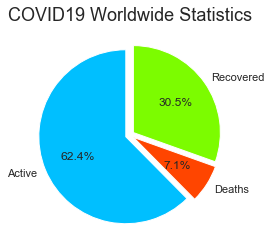

In [12]:
plt.title("COVID19 Worldwide Statistics", fontsize = 18)
colors = ['deepskyblue','orangered','lawngreen']
explode =(0.05,0.05,0.05) 
labels = ['Active', 'Deaths', 'Recovered']
plt.pie(pd.DataFrame({'Confirmed cases': [1993529, 227638, 972719]}), explode = explode,labels= labels, colors=colors, startangle=90, autopct='%.1f%%') 
plt.show()

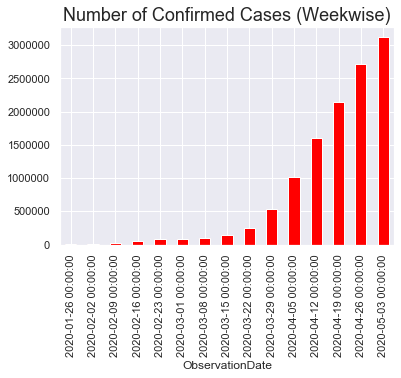

In [13]:
plt.title("Number of Confirmed Cases (Weekwise)", fontsize = 18)
datewise['Confirmed'].resample('W').mean().plot.bar(color='red',)

In [14]:
datewise["Active"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed"]=datewise["Recovered"]+datewise["Deaths"]

datewise

,Confirmed,Deaths,Recovered,Active,Closed
ObservationDate,,,,,
2020-01-22,555,17,28,510,45
2020-01-23,653,18,30,605,48
2020-01-24,941,26,36,879,62
2020-01-25,1438,42,39,1357,81
2020-01-26,2118,56,52,2010,108
...,...,...,...,...,...
2020-04-25,2896746,202846,816685,1877215,1019531
2020-04-26,2971475,206544,865733,1899198,1072277
2020-04-27,3041764,211167,893967,1936630,1105134


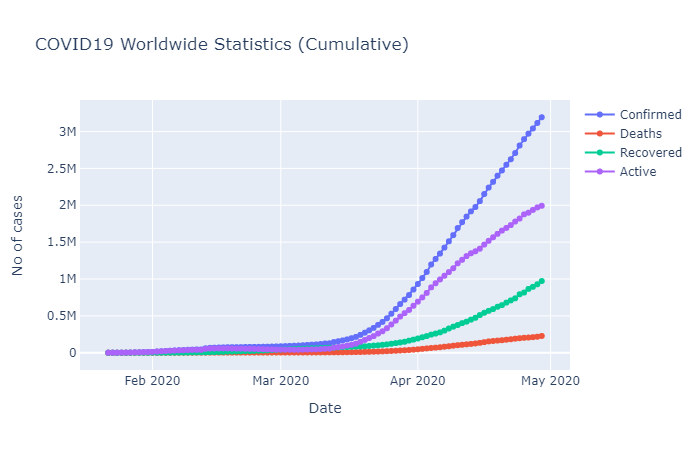

In [15]:
worldwide = datewise.groupby('ObservationDate').sum().reset_index()
worldwide
fig = go.Figure()
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Active'],
                    mode='lines+markers',
                    name='Active'))

fig.update_layout(
    title="COVID19 Worldwide Statistics (Cumulative)",
    xaxis_title="Date",
    yaxis_title="No of cases"    
)


fig.show(renderer="png") 

In [16]:
Countries = data.groupby(['ObservationDate', 'Country/Region']).sum().reset_index()

In [17]:
daywise = datewise.copy()

In [18]:
for i in range(1,99): 
    daywise.iloc[i] = datewise.iloc[i] - datewise.iloc[i-1]

In [19]:
daywise

,Confirmed,Deaths,Recovered,Active,Closed
ObservationDate,,,,,
2020-01-22,555,17,28,510,45
2020-01-23,98,1,2,95,3
2020-01-24,288,8,6,274,14
2020-01-25,497,16,3,478,19
2020-01-26,680,14,13,653,27
...,...,...,...,...,...
2020-04-25,86031,5695,23265,57071,28960
2020-04-26,74729,3698,49048,21983,52746
2020-04-27,70289,4623,28234,37432,32857


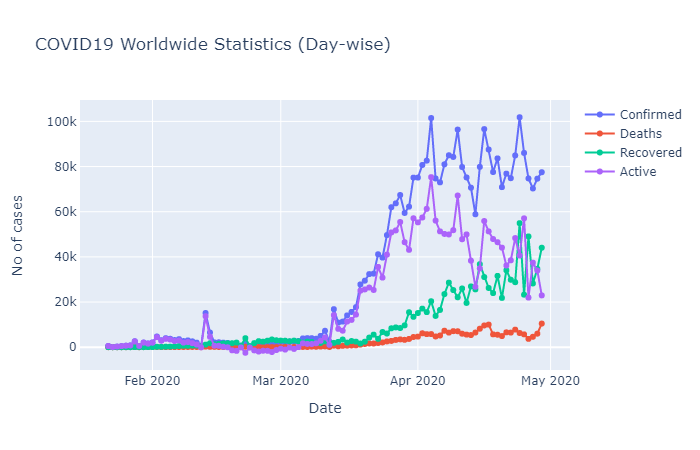

In [20]:
worldwide = daywise.reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Deaths'],
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))
fig.add_trace(go.Scatter(x=worldwide['ObservationDate'], y=worldwide['Active'],
                    mode='lines+markers',
                    name='Active'))

fig.update_layout(
    title="COVID19 Worldwide Statistics (Day-wise)",
    xaxis_title="Date",
    yaxis_title="No of cases"    
)


fig.show(renderer="png") 

- - -

In [21]:
confirmed = datewise['Confirmed'].to_frame()
deaths = datewise['Deaths'].to_frame()
recovered = datewise['Recovered'].to_frame()
active = datewise['Active'].to_frame()

---

### Countrywise Analysis

In [22]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)

In [23]:
countrywise.head()

,Confirmed,Recovered,Deaths
Country/Region,,,
US,1039909,120720,60967
Spain,236899,132929,24275
Italy,203591,71252,27682
France,166543,49118,24121
UK,166441,857,26166


In [24]:
#listing all the countries where the virus has spread to
countries=data['Country/Region'].unique().tolist()
print("Number of affected countries :",len(countries))

Number of affected countries : 220


In [25]:
#Most affected countries
country_cases = data.groupby('Country/Region', as_index=False).sum()
country_cases["Mortality Rate (per 100)"] = np.round(100*country_cases["Deaths"]/country_cases["Confirmed"],2)
country_cases.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Mortality Rate (per 100)
0,Azerbaijan,1,0,0,0.00
1,"('St. Martin',)",2,0,0,0.00
2,Afghanistan,26291,825,2693,3.14
3,Albania,17091,788,7673,4.61
4,Algeria,70319,9071,22887,12.90
5,Andorra,21148,914,5205,4.32
6,Angola,622,64,123,10.29
7,Antigua and Barbuda,654,59,114,9.02
8,Argentina,79642,3422,19257,4.30
9,Armenia,38544,507,11392,1.32


### Plotting Confirmed, Active and Deaths

In [26]:
top_countries = countrywise.head(10)

In [27]:
top_countries

,Confirmed,Recovered,Deaths
Country/Region,,,
US,1039909,120720,60967
Spain,236899,132929,24275
Italy,203591,71252,27682
France,166543,49118,24121
UK,166441,857,26166
Germany,161539,120400,6467
Turkey,117589,44040,3081
Russia,99399,10286,972
Iran,93657,73791,5957


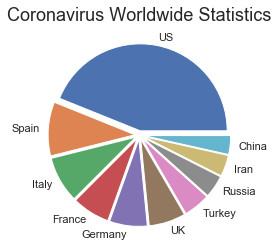

In [28]:
plt.title("Coronavirus Worldwide Statistics", fontsize = 18)
explode =(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05) 
labels = ['US','Spain','Italy','France','Germany','UK','Turkey','Russia','Iran','China']
plt.pie(pd.DataFrame({'Confirmed cases': [1039909 , 236899, 203591, 166543, 166441, 161539, 117589, 99399, 93657, 82862]}), explode = explode,labels= labels) 
plt.show()

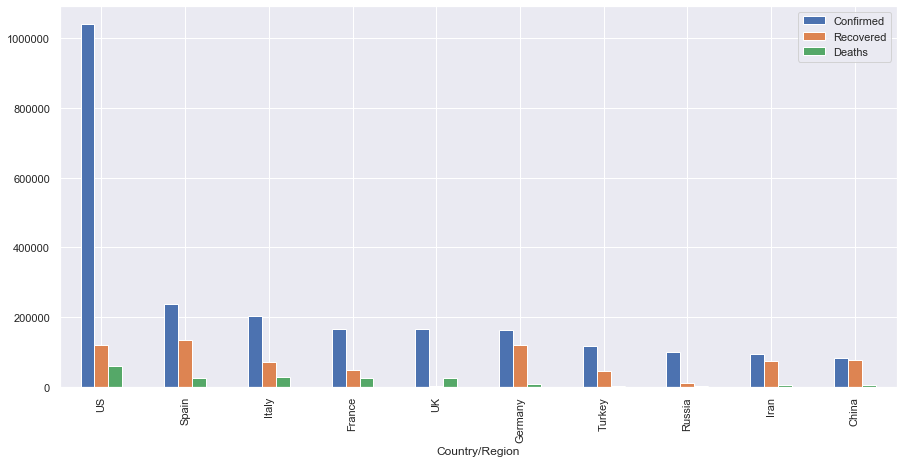

In [29]:
top_countries[['Confirmed','Recovered','Deaths']].plot.bar(figsize=(15,7))

In [30]:
top_countries.reset_index()

,Country/Region,Confirmed,Recovered,Deaths
0,US,1039909,120720,60967
1,Spain,236899,132929,24275
2,Italy,203591,71252,27682
3,France,166543,49118,24121
4,UK,166441,857,26166
5,Germany,161539,120400,6467
6,Turkey,117589,44040,3081
7,Russia,99399,10286,972
8,Iran,93657,73791,5957
9,China,82862,77610,4633


In [31]:
Countries = data.groupby(['ObservationDate', 'Country/Region']).sum().reset_index()
Countries['Active'] = Countries['Confirmed'] - (Countries['Deaths'] + Countries['Recovered'])

- - -

## Analysis of worldwide cases data and Forecasting the number of confirmed, recovered, death and active cases by May 14, 2020 :

## Holt's Winter Model

### Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor  𝛼  (alpha), Double Exponential Smoothing adds a second smoothing factor  𝛽  (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ( 0<𝛽≤1 ). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

If a time series displays a straight-line sloped trend, you would use an additive adjustment. If the time series displays an exponential (curved) trend, you would use a multiplicative adjustment.

We can see that Double Exponential Smoothing is a much better representation of the time series data.
Let's see if using a multiplicative seasonal adjustment helps.

### Analysis of Confirmed Cases

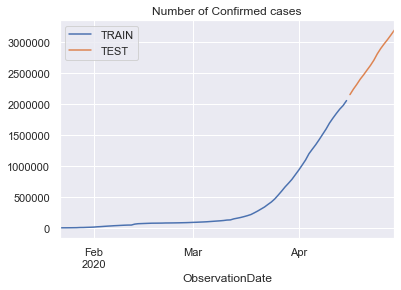

In [32]:
train = datewise['Confirmed'].iloc[:85] 
test = datewise['Confirmed'].iloc[85:]

train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',title="Number of Confirmed cases");

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train,trend='mul').fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

test_predictions

2020-04-16    2.134224e+06
2020-04-17    2.216674e+06
2020-04-18    2.302309e+06
2020-04-19    2.391252e+06
2020-04-20    2.483631e+06
2020-04-21    2.579578e+06
2020-04-22    2.679233e+06
2020-04-23    2.782737e+06
2020-04-24    2.890240e+06
2020-04-25    3.001896e+06
2020-04-26    3.117865e+06
2020-04-27    3.238315e+06
2020-04-28    3.363418e+06
2020-04-29    3.493354e+06
Freq: D, Name: HW Forecast, dtype: float64

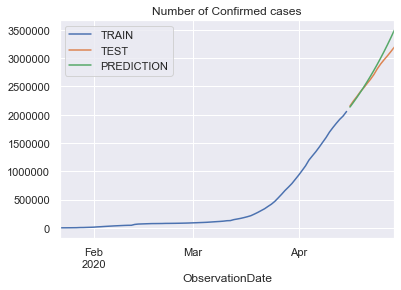

In [34]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Confirmed cases");

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train,trend='add').fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

test_predictions

2020-04-16    2.130301e+06
2020-04-17    2.205461e+06
2020-04-18    2.280621e+06
2020-04-19    2.355780e+06
2020-04-20    2.430940e+06
2020-04-21    2.506100e+06
2020-04-22    2.581260e+06
2020-04-23    2.656419e+06
2020-04-24    2.731579e+06
2020-04-25    2.806739e+06
2020-04-26    2.881899e+06
2020-04-27    2.957058e+06
2020-04-28    3.032218e+06
2020-04-29    3.107378e+06
Freq: D, Name: HW Forecast, dtype: float64

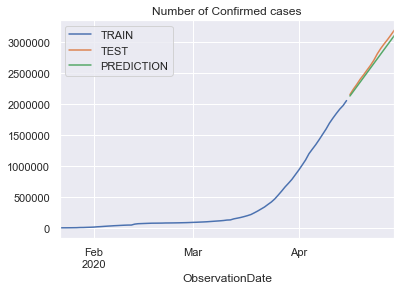

In [36]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Confirmed cases");

### Additive adjustment performs better than multiplicative adjustment.

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

hw_mae = mean_absolute_error(test,test_predictions)
hw_mse = mean_squared_error(test,test_predictions)
hw_rmse = np.sqrt(mean_squared_error(test,test_predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, test_predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 325029.9164830282
MAE : 59530.95694605607
MSE : 4102198558.3369737
RMSE : 64048.40792976024
R-squared-values : 0.9611697662299186


In [38]:
final_model = ExponentialSmoothing(datewise['Confirmed'],trend='add').fit()
forecast_predictions = final_model.forecast(15)

forecast_predictions

2020-04-30    3.270684e+06
2020-05-01    3.347482e+06
2020-05-02    3.424279e+06
2020-05-03    3.501077e+06
2020-05-04    3.577875e+06
2020-05-05    3.654673e+06
2020-05-06    3.731470e+06
2020-05-07    3.808268e+06
2020-05-08    3.885066e+06
2020-05-09    3.961864e+06
2020-05-10    4.038662e+06
2020-05-11    4.115459e+06
2020-05-12    4.192257e+06
2020-05-13    4.269055e+06
2020-05-14    4.345853e+06
Freq: D, dtype: float64

In [39]:
hw_confirmed = '{:,}'.format(int(forecast_predictions[-1]))

print('\n')

print("Forecasted on May 14 :",hw_confirmed)



Forecasted on May 14 : 4,345,852


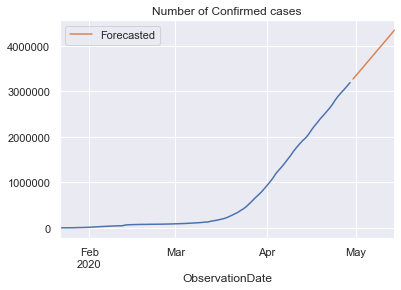

In [40]:
datewise['Confirmed'].plot()
forecast_predictions.plot(legend=True, label = "Forecasted",title="Number of Confirmed cases");

### Analysis of Recovered cases

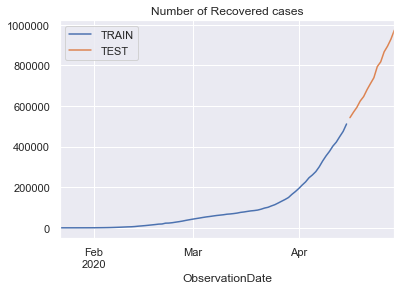

In [41]:
train = datewise['Recovered'].iloc[:85] 
test = datewise['Recovered'].iloc[85:]

train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',title="Number of Recovered cases");

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train,trend='add').fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

test_predictions

2020-04-16    544226.915350
2020-04-17    578709.317603
2020-04-18    613191.719855
2020-04-19    647674.122108
2020-04-20    682156.524361
2020-04-21    716638.926613
2020-04-22    751121.328866
2020-04-23    785603.731119
2020-04-24    820086.133371
2020-04-25    854568.535624
2020-04-26    889050.937876
2020-04-27    923533.340129
2020-04-28    958015.742382
2020-04-29    992498.144634
Freq: D, Name: HW Forecast, dtype: float64

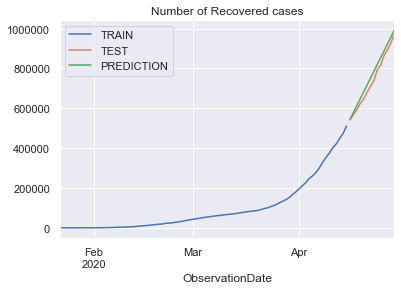

In [43]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Recovered cases");

In [44]:
hw_mae = mean_absolute_error(test,test_predictions)
hw_mse = mean_squared_error(test,test_predictions)
hw_rmse = np.sqrt(mean_squared_error(test,test_predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, test_predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 135048.42171631005
MAE : 27534.6014208745
MSE : 896303040.9531223
RMSE : 29938.32061009973
R-squared-values : 0.9508553955621314


In [45]:
final_model = ExponentialSmoothing(datewise['Recovered'],trend='add').fit()
forecast_predictions = final_model.forecast(15)

forecast_predictions

2020-04-30    1.008113e+06
2020-05-01    1.045977e+06
2020-05-02    1.083841e+06
2020-05-03    1.121705e+06
2020-05-04    1.159569e+06
2020-05-05    1.197433e+06
2020-05-06    1.235298e+06
2020-05-07    1.273162e+06
2020-05-08    1.311026e+06
2020-05-09    1.348890e+06
2020-05-10    1.386754e+06
2020-05-11    1.424619e+06
2020-05-12    1.462483e+06
2020-05-13    1.500347e+06
2020-05-14    1.538211e+06
Freq: D, dtype: float64

In [46]:
hw_recovered = '{:,}'.format(int(forecast_predictions[-1]))

print('\n')

print("Forecasted on May 14 :",hw_recovered)



Forecasted on May 14 : 1,538,211


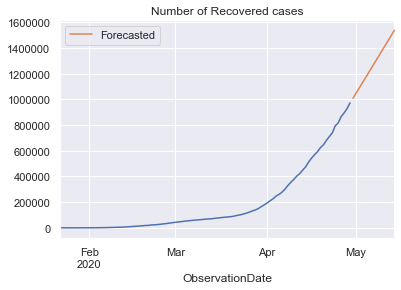

In [47]:
datewise['Recovered'].plot()
forecast_predictions.plot(legend=True, label = "Forecasted",title="Number of Recovered cases");

### Analysis of Deaths

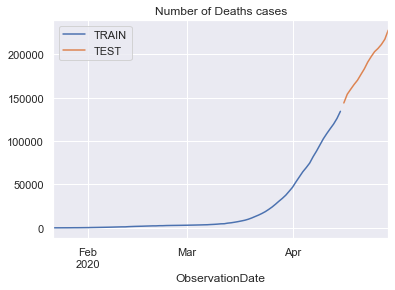

In [48]:
train = datewise['Deaths'].iloc[:85] 
test = datewise['Deaths'].iloc[85:]

train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',title="Number of Deaths cases");

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train,trend='add').fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

test_predictions

2020-04-16    142369.603509
2020-04-17    150562.376154
2020-04-18    158755.148799
2020-04-19    166947.921443
2020-04-20    175140.694088
2020-04-21    183333.466732
2020-04-22    191526.239377
2020-04-23    199719.012021
2020-04-24    207911.784666
2020-04-25    216104.557311
2020-04-26    224297.329955
2020-04-27    232490.102600
2020-04-28    240682.875244
2020-04-29    248875.647889
Freq: D, Name: HW Forecast, dtype: float64

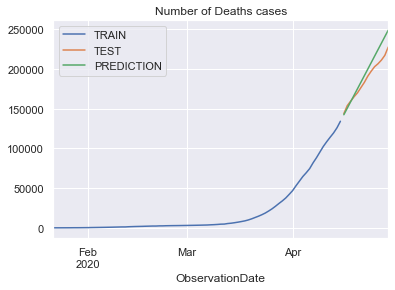

In [50]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Deaths cases");

In [51]:
hw_mae = mean_absolute_error(test,test_predictions)
hw_mse = mean_squared_error(test,test_predictions)
hw_rmse = np.sqrt(mean_squared_error(test,test_predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, test_predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 24643.29974064234
MAE : 10317.107347447603
MSE : 164659542.2684302
RMSE : 12831.973436242384
R-squared-values : 0.7288627512845376


In [52]:
final_model = ExponentialSmoothing(datewise['Deaths'],trend='add').fit()
forecast_predictions = final_model.forecast(15)

forecast_predictions

2020-04-30    238121.786598
2020-05-01    248606.023127
2020-05-02    259090.259656
2020-05-03    269574.496186
2020-05-04    280058.732715
2020-05-05    290542.969245
2020-05-06    301027.205774
2020-05-07    311511.442303
2020-05-08    321995.678833
2020-05-09    332479.915362
2020-05-10    342964.151892
2020-05-11    353448.388421
2020-05-12    363932.624950
2020-05-13    374416.861480
2020-05-14    384901.098009
Freq: D, dtype: float64

In [53]:
hw_deaths = '{:,}'.format(int(forecast_predictions[-1]))

print('\n')

print("Forecasted on May 14 :",hw_deaths)



Forecasted on May 14 : 384,901


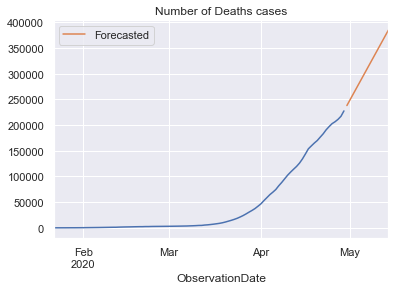

In [54]:
datewise['Deaths'].plot()
forecast_predictions.plot(legend=True, label = "Forecasted",title="Number of Deaths cases");

### Analysis of Active cases

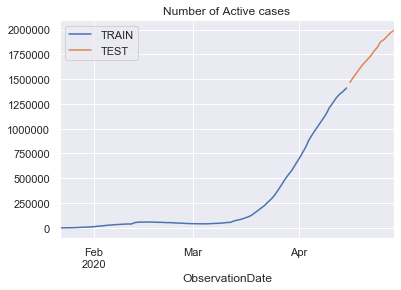

In [55]:
train = datewise['Active'].iloc[:85] 
test = datewise['Active'].iloc[85:]

train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',title="Number of Active cases");

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train,trend='add').fit()

test_predictions = fitted_model.forecast(14).rename('HW Forecast')

test_predictions

2020-04-16    1.444116e+06
2020-04-17    1.477512e+06
2020-04-18    1.510908e+06
2020-04-19    1.544305e+06
2020-04-20    1.577701e+06
2020-04-21    1.611097e+06
2020-04-22    1.644494e+06
2020-04-23    1.677890e+06
2020-04-24    1.711286e+06
2020-04-25    1.744683e+06
2020-04-26    1.778079e+06
2020-04-27    1.811475e+06
2020-04-28    1.844872e+06
2020-04-29    1.878268e+06
Freq: D, Name: HW Forecast, dtype: float64

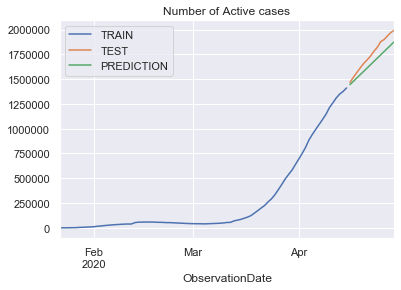

In [57]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',title="Number of Active cases");

In [58]:
hw_mae = mean_absolute_error(test,test_predictions)
hw_mse = mean_squared_error(test,test_predictions)
hw_rmse = np.sqrt(mean_squared_error(test,test_predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, test_predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 166095.49363692832
MAE : 90267.0999383782
MSE : 9241959969.787512
RMSE : 96135.11309499518
R-squared-values : 0.664997241068453


In [59]:
final_model = ExponentialSmoothing(datewise['Active'],trend='add').fit()
forecast_predictions = final_model.forecast(15)

forecast_predictions

2020-04-30    2.021369e+06
2020-05-01    2.049209e+06
2020-05-02    2.077049e+06
2020-05-03    2.104889e+06
2020-05-04    2.132729e+06
2020-05-05    2.160569e+06
2020-05-06    2.188409e+06
2020-05-07    2.216249e+06
2020-05-08    2.244089e+06
2020-05-09    2.271929e+06
2020-05-10    2.299769e+06
2020-05-11    2.327609e+06
2020-05-12    2.355449e+06
2020-05-13    2.383289e+06
2020-05-14    2.411129e+06
Freq: D, dtype: float64

In [60]:
hw_active = '{:,}'.format(int(forecast_predictions[-1]))

print('\n')

print("Forecasted on May 14 :",hw_active)



Forecasted on May 14 : 2,411,128


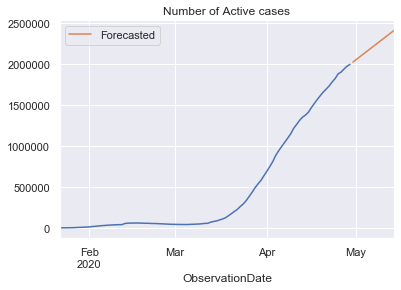

In [61]:
datewise['Active'].plot()
forecast_predictions.plot(legend=True, label = "Forecasted",title="Number of Active cases");

- - -

### Augmented Dickey-Fuller Test

I used the augmented Dickey-Fuller Test to determine whether the Confirmed, Recovered, Deaths, and Active cases are stationary or not. A stationary data has a constant mean, variance, and correlation over time. We can easily visually interpret that the data is non-stationary as the numbers are increasing exponentially. This performs a test in the form of a classic null hypothesis test and returns a p-value. I assumed the null hypothesis as the dataset is non-stationary. If the p-value is less than 0.05, the null hypothesis is rejected and the dataset is stationary. If the p-value > 0.05, the null hypothesis is accepted.

In [62]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [63]:
adf_test(datewise['Confirmed'])

Augmented Dickey-Fuller Test: 
ADF test statistic       1.700085
p-value                  0.998129
# lags used             10.000000
# observations          88.000000
critical value (1%)     -3.506944
critical value (5%)     -2.894990
critical value (10%)    -2.584615
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [64]:
adf_test(datewise['Recovered'])

Augmented Dickey-Fuller Test: 
ADF test statistic       2.635096
p-value                  0.999081
# lags used             12.000000
# observations          86.000000
critical value (1%)     -3.508783
critical value (5%)     -2.895784
critical value (10%)    -2.585038
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [65]:
adf_test(datewise['Deaths'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.417021
p-value                  0.907218
# lags used             12.000000
# observations          86.000000
critical value (1%)     -3.508783
critical value (5%)     -2.895784
critical value (10%)    -2.585038
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [66]:
adf_test(datewise['Active'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.415984
p-value                  0.907396
# lags used             12.000000
# observations          86.000000
critical value (1%)     -3.508783
critical value (5%)     -2.895784
critical value (10%)    -2.585038
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


- - -

## Autoregressive Model
Autoregressive models operate under the premise that past values have an effect on current values, which makes the statistical technique popular for analyzing nature, economics, and other processes that vary over time. Multiple regression models forecast a variable using a linear combination of predictors, whereas autoregressive models use a combination of past values of the variable.

### Analysis of Confirmed Cases

In [67]:
train = datewise['Confirmed'].iloc[:85] 
test = datewise['Confirmed'].iloc[85:]

from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train)

ARfit = model.fit()
print(f'Lag: {ARfit.k_ar}')
#print(f'Coefficients:\n{ARfit.params}')

Lag: 12


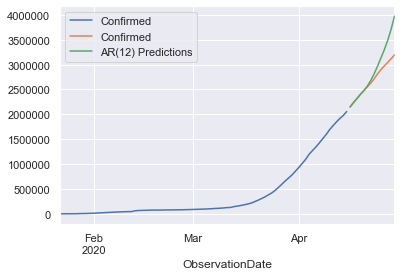

In [68]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(12) Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

train.plot(legend=True)
test.plot(legend=True)
predictions.plot(legend=True);

In [69]:
ar_mae = mean_absolute_error(test,predictions)
ar_mse = mean_squared_error(test,predictions)
ar_rmse = np.sqrt(mean_squared_error(test,predictions))
ar_std = np.std(test)
ar_r2 = r2_score(test, predictions)

print("SD :",ar_std)
print('MAE :',ar_mae)
print('MSE :',ar_mse)
print('RMSE :',ar_rmse)
print("R-squared-values :",ar_r2)

SD : 325029.9164830282
MAE : 193281.1756830974
MSE : 96379461983.61057
RMSE : 310450.41791501996
R-squared-values : 0.0876996843918113


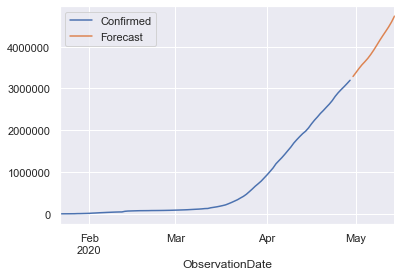

In [70]:
# First, retrain the model on the full dataset
model = AR(datewise['Confirmed'])

# Next, fit the model
ARfit = model.fit(maxlag = 12)

# Make predictions
fcast = ARfit.predict(start=len(datewise), end=len(datewise)+14, dynamic=False).rename('Forecast')
#fcast

# Plotting the results
datewise['Confirmed'].plot(legend=True)
fcast.plot(legend=True);

In [71]:
ar_confirmed = '{:,}'.format(int(fcast[-1]))
print("Forecasted on May 14 :",ar_confirmed)

Forecasted on May 14 : 4,727,363


### Analysis of Recovered Cases

In [72]:
train = datewise['Recovered'].iloc[:85] 
test = datewise['Recovered'].iloc[85:]

from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train)

ARfit = model.fit()
print(f'Lag: {ARfit.k_ar}')
#print(f'Coefficients:\n{ARfit.params}')

Lag: 12


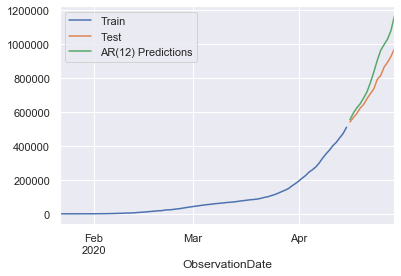

In [73]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(12) Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

train.plot(legend=True,label='Train')
test.plot(legend=True,label='Test')
predictions.plot(legend=True);

In [74]:
hw_mae = mean_absolute_error(test,predictions)
hw_mse = mean_squared_error(test,predictions)
hw_rmse = np.sqrt(mean_squared_error(test,predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 135048.42171631005
MAE : 87216.0277769037
MSE : 10856804485.544508
RMSE : 104195.99073642185
R-squared-values : 0.40471767078466503


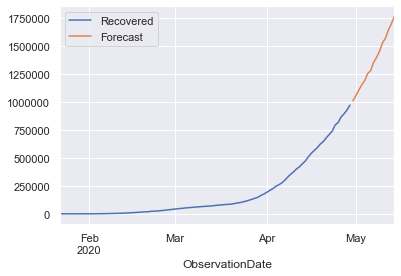

In [75]:
# First, retrain the model on the full dataset
model = AR(datewise['Recovered'])

# Next, fit the model
ARfit = model.fit(maxlag = 12)

# Make predictions
fcast = ARfit.predict(start=len(datewise), end=len(datewise)+14, dynamic=False).rename('Forecast')
#fcast

# Plotting the results
datewise['Recovered'].plot(legend=True)
fcast.plot(legend=True);

In [76]:
ar_recovered = '{:,}'.format(int(fcast[-1]))
print("Forecasted on May 14 :",ar_recovered)

Forecasted on May 14 : 1,768,459


### Analysis of Deaths

In [77]:
train = datewise['Deaths'].iloc[:85] 
test = datewise['Deaths'].iloc[85:]

from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train)

ARfit = model.fit()
print(f'Lag: {ARfit.k_ar}')
#print(f'Coefficients:\n{ARfit.params}')

Lag: 12


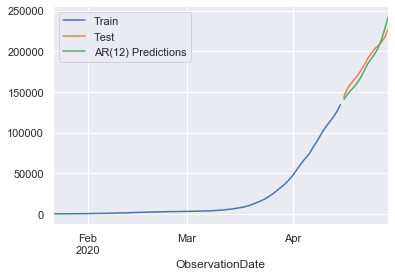

In [78]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(12) Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

train.plot(legend=True,label='Train')
test.plot(legend=True,label='Test')
predictions.plot(legend=True);

In [79]:
hw_mae = mean_absolute_error(test,predictions)
hw_mse = mean_squared_error(test,predictions)
hw_rmse = np.sqrt(mean_squared_error(test,predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 24643.29974064234
MAE : 7261.777038997012
MSE : 62988418.28158652
RMSE : 7936.524319977008
R-squared-values : 0.896279886373263


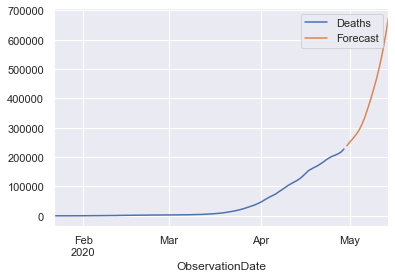

In [80]:
# First, retrain the model on the full dataset
model = AR(datewise['Deaths'])

# Next, fit the model
ARfit = model.fit(maxlag = 12)

# Make predictions
fcast = ARfit.predict(start=len(datewise), end=len(datewise)+14, dynamic=False).rename('Forecast')
#fcast

# Plotting the results
datewise['Deaths'].plot(legend=True)
fcast.plot(legend=True);

In [81]:
ar_deaths = '{:,}'.format(int(fcast[-1]))
print("Forecasted on May 14 :",ar_deaths)

Forecasted on May 14 : 673,726


### Analysis of Active Cases

In [82]:
train = datewise['Active'].iloc[:85] 
test = datewise['Active'].iloc[85:]

from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train)

ARfit = model.fit()
print(f'Lag: {ARfit.k_ar}')
#print(f'Coefficients:\n{ARfit.params}')

Lag: 12


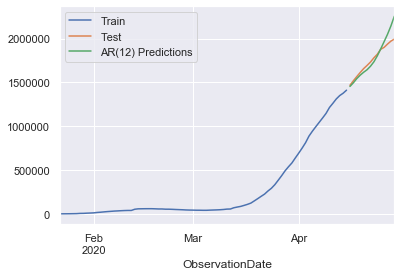

In [83]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(12) Predictions'

predictions = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

train.plot(legend=True,label='Train')
test.plot(legend=True,label='Test')
predictions.plot(legend=True);

In [84]:
hw_mae = mean_absolute_error(test,predictions)
hw_mse = mean_squared_error(test,predictions)
hw_rmse = np.sqrt(mean_squared_error(test,predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 166095.49363692832
MAE : 65007.19069989037
MSE : 9048333147.038265
RMSE : 95122.72676410335
R-squared-values : 0.6720158302028137


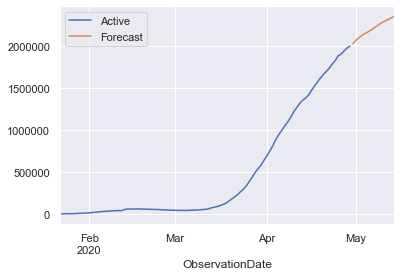

In [85]:
# First, retrain the model on the full dataset
model = AR(datewise['Active'])

# Next, fit the model
ARfit = model.fit(maxlag = 12)

# Make predictions
fcast = ARfit.predict(start=len(datewise), end=len(datewise)+14, dynamic=False).rename('Forecast')
#fcast

# Plotting the results
datewise['Active'].plot(legend=True)
fcast.plot(legend=True);

In [86]:
ar_active = '{:,}'.format(int(fcast[-1]))
print("Forecasted on May 14 :",ar_active)

Forecasted on May 14 : 2,350,483


#### Since AR Model did not predict accurately, let us try ARIMA, a sophisticated autoregressive model that considers trends, cycles, seasonality, erros and other non-static types of data when making forecasts.

- - -

## ARIMA(p,d,q)

#### Analysis of Confirmed cases

In [87]:
from pmdarima import auto_arima

auto_arima(datewise['Confirmed']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -996.363
Date:                Sat, 26 Sep 2020   AIC                           2000.726
Time:                        07:06:21   BIC                           2011.025
Sample:                             0   HQIC                          2004.891
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1416.2451    498.488      2.841      0.004     439.227    2393.263
ma.L1         -0.1869      0.069     -2.712      0.007      -0.322      -0.052
ma.L2         -0.1773      0.087     -2.028      0.043      -0.349      -0.006
sigma2      5.173e+07      0.000   1.45e+11      0.000    5.17e+07    5.17e+07
===================================================================================
Ljung-Box (Q):                       73.85   Jarque-Bera (JB):                12.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.16   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+28. Standard errors may be unstable.
"""

In [88]:
train = datewise['Confirmed'].iloc[:85]
test = datewise['Confirmed'].iloc[85:]

In [89]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(0,2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   83
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -842.760
Method:                       css-mle   S.D. of innovations           6211.873
Date:                Sat, 26 Sep 2020   AIC                           1693.519
Time:                        07:06:21   BIC                           1703.195
Sample:                    01-24-2020   HQIC                          1697.406
                         - 04-15-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                907.4191    483.462      1.877      0.061     -40.148    1854.986
ma.L1.D2.Confirmed    -0.3040      0.114     -2.658      0.008      -0.528      -0.080
ma.L2.D2.Confirmed     0.0091      0.117      0.078      0.938      -0.221       0.239
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.7010           +0.0000j            3.7010            0.0000
MA.2           29.6182           +0.0000j           29.6182            0.0000
-----------------------------------------------------------------------------
"""

In [90]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

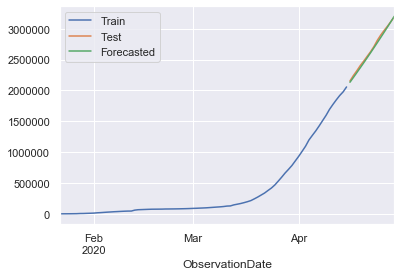

In [91]:
train.plot(label = 'Train', legend=True)
test.plot(label = 'Test', legend=True)
predictions.plot(label = 'Forecasted',legend=True);

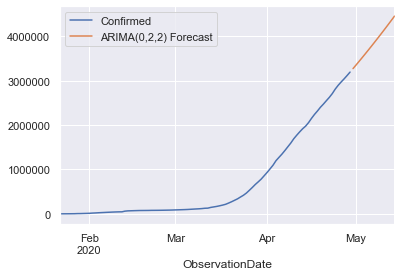

In [92]:
#Retrain the model on the full data, and forecast the future

model = ARIMA(datewise['Confirmed'],order=(0,2,2))
results = model.fit()
fcast = results.predict(len(datewise),len(datewise)+14,typ='levels').rename('ARIMA(0,2,2) Forecast')

datewise['Confirmed'].plot(legend=True)
fcast.plot(legend=True)

In [93]:
fcast

2020-04-30    3.272290e+06
2020-05-01    3.351489e+06
2020-05-02    3.431492e+06
2020-05-03    3.512299e+06
2020-05-04    3.593910e+06
2020-05-05    3.676326e+06
2020-05-06    3.759546e+06
2020-05-07    3.843570e+06
2020-05-08    3.928399e+06
2020-05-09    4.014031e+06
2020-05-10    4.100468e+06
2020-05-11    4.187709e+06
2020-05-12    4.275755e+06
2020-05-13    4.364604e+06
2020-05-14    4.454258e+06
Freq: D, Name: ARIMA(0,2,2) Forecast, dtype: float64

In [94]:
arima_mae = mean_absolute_error(test,predictions)
arima_mse = mean_squared_error(test,predictions)
arima_rmse = np.sqrt(mean_squared_error(test,predictions))
arima_std = np.std(test)

print("SD :",arima_std)
print('MAE :',arima_mae)
print('MSE :',arima_mse)
print('RMSE :',arima_rmse)
print("R-squared-values :",r2_score(test, predictions))

SD : 325029.9164830282
MAE : 23957.276833596938
MSE : 691817369.549321
RMSE : 26302.42136285785
R-squared-values : 0.9934514554076843


In [95]:
arima_confirmed = '{:,}'.format(int(fcast[-1]))

print("Forecasted on May 14 :",arima_confirmed)

Forecasted on May 14 : 4,454,258


#### Analysis of Recovered cases

In [96]:
auto_arima(datewise['Recovered']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -932.258
Date:                Sat, 26 Sep 2020   AIC                           1874.516
Time:                        07:06:26   BIC                           1887.389
Sample:                             0   HQIC                          1879.721
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    883.1535    738.367      1.196      0.232    -564.020    2330.327
ar.L1         -1.7282      0.056    -31.016      0.000      -1.837      -1.619
ar.L2         -0.9236      0.051    -18.007      0.000      -1.024      -0.823
ma.L1          0.8998      0.041     22.044      0.000       0.820       0.980
sigma2      1.276e+07      0.261   4.89e+07      0.000    1.28e+07    1.28e+07
===================================================================================
Ljung-Box (Q):                       36.48   Jarque-Bera (JB):               259.77
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              82.92   Skew:                             1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.52e+22. Standard errors may be unstable.
"""

In [97]:
train = datewise['Recovered'].iloc[:85]
test = datewise['Recovered'].iloc[85:]

In [98]:
model = ARIMA(train,order=(2,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Recovered   No. Observations:                   83
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -801.267
Method:                       css-mle   S.D. of innovations           3734.372
Date:                Sat, 26 Sep 2020   AIC                           1612.533
Time:                        07:06:27   BIC                           1624.628
Sample:                    01-24-2020   HQIC                          1617.392
                         - 04-15-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8146.4063        nan        nan        nan         nan         nan
ar.L1.D2.Recovered     1.8868      0.054     34.981      0.000       1.781       1.992
ar.L2.D2.Recovered    -0.8869      0.058    -15.220      0.000      -1.001      -0.773
ma.L1.D2.Recovered    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           +0.0000j            1.0010            0.0000
AR.2            1.1264           +0.0000j            1.1264            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [99]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

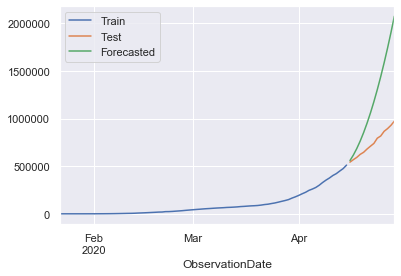

In [100]:
train.plot(label = 'Train', legend=True)
test.plot(label = 'Test', legend=True)
predictions.plot(label = "Forecasted", legend=True);

In [101]:
hw_mae = mean_absolute_error(test,predictions)
hw_mse = mean_squared_error(test,predictions)
hw_rmse = np.sqrt(mean_squared_error(test,predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 135048.42171631005
MAE : 452340.1277490856
MSE : 321288126235.9018
RMSE : 566822.8349633612
R-squared-values : -16.61633861875205


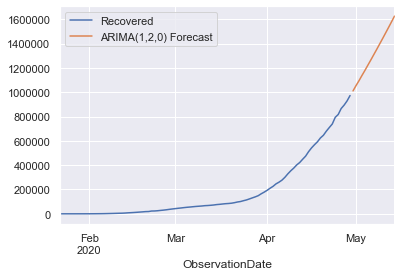

In [102]:
model = ARIMA(datewise['Recovered'],order=(1,2,0))
results = model.fit()
fcast = results.predict(len(datewise),len(datewise)+14,typ='levels').rename('ARIMA(1,2,0) Forecast')

datewise['Recovered'].plot(legend=True)
fcast.plot(legend=True)

In [103]:
fcast

2020-04-30    1.010660e+06
2020-05-01    1.053792e+06
2020-05-02    1.093855e+06
2020-05-03    1.136881e+06
2020-05-04    1.178465e+06
2020-05-05    1.221825e+06
2020-05-06    1.264610e+06
2020-05-07    1.308536e+06
2020-05-08    1.352351e+06
2020-05-09    1.396969e+06
2020-05-10    1.441723e+06
2020-05-11    1.487100e+06
2020-05-12    1.532744e+06
2020-05-13    1.578915e+06
2020-05-14    1.625423e+06
Freq: D, Name: ARIMA(1,2,0) Forecast, dtype: float64

In [104]:
arima_recovered = '{:,}'.format(int(fcast[-1]))

print("Forecasted on May 14 :",arima_recovered)

Forecasted on May 14 : 1,625,422


#### Analysis of Deaths

In [105]:
stepwise_model = auto_arima(datewise['Deaths'], start_p=1, d=1, start_q=1,
                           max_p=1, max_q=1, seasonal=False,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
print(stepwise_model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=1609.128, BIC=1619.467, Time=0.080 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=1845.548, BIC=1850.717, Time=0.034 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=1607.979, BIC=1615.734, Time=0.042 seconds
Near non-invertible roots for order (1, 1, 0)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=1759.550, BIC=1767.305, Time=0.226 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=1891.796, BIC=1894.381, Time=0.016 seconds
Total fit time: 0.397 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -800.990
Date:                Sat, 26 Sep 2020   AIC                           1

In [106]:
train = datewise['Deaths'].iloc[:85]
test = datewise['Deaths'].iloc[85:]

In [107]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(1,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Deaths   No. Observations:                   84
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -635.360
Method:                       css-mle   S.D. of innovations            454.750
Date:                Sat, 26 Sep 2020   AIC                           1276.720
Time:                        07:06:29   BIC                           1284.012
Sample:                    01-23-2020   HQIC                          1279.651
                         - 04-15-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3514.1952   3331.756      1.055      0.292   -3015.927       1e+04
ar.L1.D.Deaths     0.9926      0.009    110.054      0.000       0.975       1.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0074           +0.0000j            1.0074            0.0000
-----------------------------------------------------------------------------
"""

In [108]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

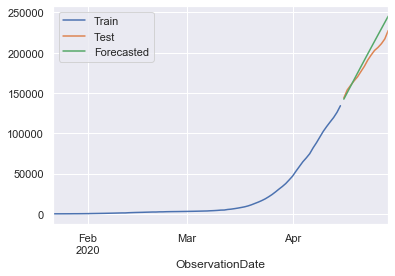

In [109]:
train.plot(label = 'Train', legend=True)
test.plot(label = 'Test', legend=True)
predictions.plot(label = "Forecasted", legend=True);

In [110]:
hw_mae = mean_absolute_error(test,predictions)
hw_mse = mean_squared_error(test,predictions)
hw_rmse = np.sqrt(mean_squared_error(test,predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 24643.29974064234
MAE : 9020.472230361565
MSE : 123600095.49886186
RMSE : 11117.557982707438
R-squared-values : 0.796473442274623


In [111]:
model = ARIMA(datewise['Deaths'],order=(1,1,0))
results = model.fit()
fcast = results.predict(len(datewise),len(datewise)+14,typ='levels').rename('ARIMA(1,1,0) Forecast')
fcast

2020-04-30    237961.758208
2020-05-01    248128.048544
2020-05-02    258140.556597
2020-05-03    268002.881696
2020-05-04    277718.538923
2020-05-05    287290.961092
2020-05-06    296723.500668
2020-05-07    306019.431652
2020-05-08    315181.951414
2020-05-09    324214.182491
2020-05-10    333119.174334
2020-05-11    341899.905021
2020-05-12    350559.282928
2020-05-13    359100.148358
2020-05-14    367525.275137
Freq: D, Name: ARIMA(1,1,0) Forecast, dtype: float64

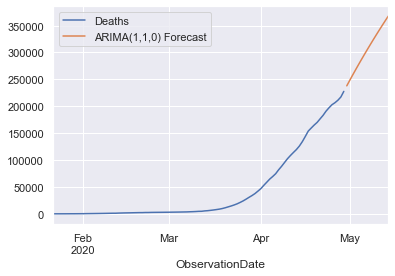

In [112]:
datewise['Deaths'].plot(legend=True)
fcast.plot(legend=True)

In [113]:
arima_deaths = '{:,}'.format(int(fcast[-1]))

print("Forecasted on May 14 :",arima_deaths)

Forecasted on May 14 : 367,525


#### Analysis of Active cases

In [114]:
auto_arima(datewise['Active']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -995.884
Date:                Sat, 26 Sep 2020   AIC                           1997.768
Time:                        07:06:32   BIC                           2005.492
Sample:                             0   HQIC                          2000.891
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    454.3569    432.225      1.051      0.293    -392.789    1301.503
ma.L1         -0.4217      0.072     -5.821      0.000      -0.564      -0.280
sigma2      5.077e+07      0.005   9.94e+09      0.000    5.08e+07    5.08e+07
===================================================================================
Ljung-Box (Q):                       78.23   Jarque-Bera (JB):                50.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.25   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.57e+25. Standard errors may be unstable.
"""

In [115]:
train = datewise['Active'].iloc[:85]
test = datewise['Active'].iloc[85:]

In [116]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train,order=(0,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.Active   No. Observations:                   83
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -835.561
Method:                       css-mle   S.D. of innovations           5696.700
Date:                Sat, 26 Sep 2020   AIC                           1677.123
Time:                        07:06:33   BIC                           1684.379
Sample:                    01-24-2020   HQIC                          1680.038
                         - 04-15-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             408.5627    464.376      0.880      0.379    -501.597    1318.723
ma.L1.D2.Active    -0.2605      0.105     -2.483      0.013      -0.466      -0.055
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.8386           +0.0000j            3.8386            0.0000
-----------------------------------------------------------------------------
"""

In [117]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

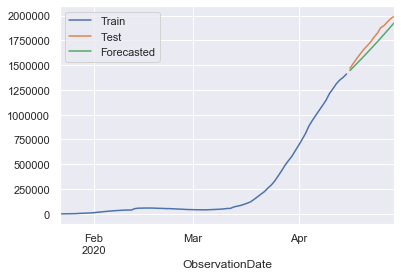

In [118]:
train.plot(label = 'Train', legend=True)
test.plot(label = 'Test', legend=True)
predictions.plot(label = "Forecasted", legend=True);

In [119]:
hw_mae = mean_absolute_error(test,predictions)
hw_mse = mean_squared_error(test,predictions)
hw_rmse = np.sqrt(mean_squared_error(test,predictions))
hw_std = np.std(test)
hw_r2 = r2_score(test, predictions)

print("SD :",hw_std)
print("MAE :",hw_mae)
print("MSE :",hw_mse)
print("RMSE :",hw_rmse)
print("R-squared-values :",hw_r2)

SD : 166095.49363692832
MAE : 69771.18398937462
MSE : 5308287298.430972
RMSE : 72857.99405989004
R-squared-values : 0.8075850906096762


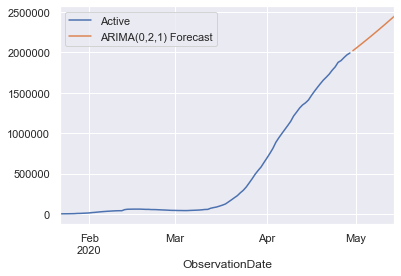

In [120]:
model = ARIMA(datewise['Active'],order=(0,2,1))
results = model.fit()
fcast = results.predict(len(datewise),len(datewise)+14,typ='levels').rename('ARIMA(0,2,1) Forecast')

datewise['Active'].plot(legend=True)
fcast.plot(legend=True)

In [121]:
fcast

2020-04-30    2.021944e+06
2020-05-01    2.050649e+06
2020-05-02    2.079644e+06
2020-05-03    2.108929e+06
2020-05-04    2.138503e+06
2020-05-05    2.168368e+06
2020-05-06    2.198523e+06
2020-05-07    2.228968e+06
2020-05-08    2.259703e+06
2020-05-09    2.290727e+06
2020-05-10    2.322042e+06
2020-05-11    2.353647e+06
2020-05-12    2.385542e+06
2020-05-13    2.417726e+06
2020-05-14    2.450201e+06
Freq: D, Name: ARIMA(0,2,1) Forecast, dtype: float64

In [122]:
arima_active = '{:,}'.format(int(fcast[-1]))

print("Forecasted on May 14 :",arima_active)

Forecasted on May 14 : 2,450,200


- - -

- - -

## Summary

In [123]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["S.No","Model", "RMSE","Standard Deviation","R-squared-value"]
x.add_row([1,"Holt's Winter Model", round(hw_rmse,3),round(hw_std,3),0.961])
x.add_row([2,"ARIMA Model", round(arima_rmse,3),round(arima_std,3),0.993])
x.add_row([3,"Autoregressive Model", round(ar_rmse,3),round(ar_std,3),0.087])
print(x)

+------+----------------------+------------+--------------------+-----------------+
| S.No |        Model         |    RMSE    | Standard Deviation | R-squared-value |
+------+----------------------+------------+--------------------+-----------------+
|  1   | Holt's Winter Model  | 72857.994  |     166095.494     |      0.961      |
|  2   |     ARIMA Model      | 26302.421  |     325029.916     |      0.993      |
|  3   | Autoregressive Model | 310450.418 |     325029.916     |      0.087      |
+------+----------------------+------------+--------------------+-----------------+


In [124]:
x = PrettyTable()
x.field_names = ["S.No","Model", "Confirmed Cases by 14th May, 2020"]
x.add_row([1,"Holt's Winter Model", hw_confirmed])
x.add_row([2,"ARIMA Model", arima_confirmed])
x.add_row([3,"Autoregressive Model", ar_confirmed])
print(x)

+------+----------------------+-----------------------------------+
| S.No |        Model         | Confirmed Cases by 14th May, 2020 |
+------+----------------------+-----------------------------------+
|  1   | Holt's Winter Model  |             4,345,852             |
|  2   |     ARIMA Model      |             4,454,258             |
|  3   | Autoregressive Model |             4,727,363             |
+------+----------------------+-----------------------------------+


In [125]:
x = PrettyTable()
x.field_names = ["S.No","Model", "Active Cases by 14th May, 2020"]
x.add_row([1,"Holt's Winter Model",  hw_active])
x.add_row([2,"ARIMA Model", arima_active])
x.add_row([3,"Autoregressive Model", ar_active])
print(x)

+------+----------------------+--------------------------------+
| S.No |        Model         | Active Cases by 14th May, 2020 |
+------+----------------------+--------------------------------+
|  1   | Holt's Winter Model  |           2,411,128            |
|  2   |     ARIMA Model      |           2,450,200            |
|  3   | Autoregressive Model |           2,350,483            |
+------+----------------------+--------------------------------+


In [126]:
x = PrettyTable()
x.field_names = ["S.No","Model", "Recovered Cases by 14th May, 2020"]
x.add_row([1,"Holt's Winter Model", hw_recovered])
x.add_row([2,"ARIMA Model", arima_recovered])
x.add_row([3,"Autoregressive Model", ar_recovered])
print(x)

+------+----------------------+-----------------------------------+
| S.No |        Model         | Recovered Cases by 14th May, 2020 |
+------+----------------------+-----------------------------------+
|  1   | Holt's Winter Model  |             1,538,211             |
|  2   |     ARIMA Model      |             1,625,422             |
|  3   | Autoregressive Model |             1,768,459             |
+------+----------------------+-----------------------------------+


In [127]:
x = PrettyTable()
x.field_names = ["S.No","Model", "Deaths by 14th May, 2020"]
x.add_row([1,"Holt's Winter Model", hw_deaths])
x.add_row([2,"ARIMA Model", arima_deaths])
x.add_row([3,"Autoregressive Model", ar_deaths])
print(x)

+------+----------------------+--------------------------+
| S.No |        Model         | Deaths by 14th May, 2020 |
+------+----------------------+--------------------------+
|  1   | Holt's Winter Model  |         384,901          |
|  2   |     ARIMA Model      |         367,525          |
|  3   | Autoregressive Model |         673,726          |
+------+----------------------+--------------------------+


- - -